# Linear_Regression

## 전체 학습 code

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


learning_rate = 0.01
training_cnt = 10

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W = tf.Variable([.0], tf.float32, name = "weight")
b = tf.Variable([.0], tf.float32, name = "bias")

for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.add(tf.multiply(X, W), b)
      cost = tf.reduce_mean(tf.square(pred - Y))
      print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())  

Running count : 0001 Training cost = 4.6666665 W = [0.] b = [0.]
Running count : 0002 Training cost = 3.6927407 W = [0.09333334] b = [0.04]
Running count : 0003 Training cost = 2.9228852 W = [0.17635557] b = [0.07546666]
Running count : 0004 Training cost = 2.314336 W = [0.2502104] b = [0.10690311]
Running count : 0005 Training cost = 1.8332924 W = [0.31591463] b = [0.13475662]
Running count : 0006 Training cost = 1.4530338 W = [0.37437233] b = [0.1594249]
Running count : 0007 Training cost = 1.1524409 W = [0.42638725] b = [0.18126151]
Running count : 0008 Training cost = 0.9148195 W = [0.47267398] b = [0.20058079]
Running count : 0009 Training cost = 0.72697395 W = [0.51386786] b = [0.21766222]
Running count : 0010 Training cost = 0.5784736 W = [0.5505337] b = [0.23275426]
Optimization Finished!
Running count : 0010 Training cost = 0.5784736 W = [0.58317375] b = [0.24607782]


#### 라이브러리 import 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### 파라메터 값 설정
- 머신러닝을 위한 기초 파라메터
- learning_rate : learning rate 값이 너무 적으면 Train 되지 않을 수 있고 learning rate 값이 너무 크면 overshooting이 발생할 수 있다.
- traing_cnt : data set에 대한 training 반복횟수

In [ ]:
learning_rate = 0.01
training_cnt = 10

#### 트레이닝 데이터 변수 선언
- 입력으로 들어가는 X, Y 설정
- numpy array를 사용 

In [ ]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

#### set model weight
- variable : 변수를 의미하며 임의의 값을 지정


In [ ]:
# Set model weights
W = tf.Variable([.0], tf.float32, name = "weight")
b = tf.Variable([.0], tf.float32, name = "bias")
#              초기값   data type,  이름정의

#### linear model (예측 값 구현)

$$H(x)=Wx+b$$

In [ ]:
# Construct a linear model (Wx+b)
pred = tf.add(tf.multiply(X, W), b)
     # X * W + b << 직접 사칙연산수식으로도 가능|

#### cost/loss function 구현

$$cost(W,b)=\frac 1m\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^2$$

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.pow(pred-Y, 2))

### * reduce_mean?
- 들어오는 입력의 평균값을 구하는 함수이다
- 아래에서 1,2,3,4 의 평균값은 2.5가 나오는 걸 볼수있다.

In [ ]:
t = [ 1., 2., 3., 4.]
r_m = tf.reduce_mean(t)
r_m.numpy()

2.5

#### 학습방법 -> cost를 최소화
- gradient decent 함수 사용(경사 하강법) 
-  파라미터 $W$, $b$ 에 대해 손실을 미분하는 과정으로, 파라미터를 변화시킬 때 손실이 얼마나 변화하는지를 알아본다. 
- with tf.GradientTape() as tape: 안에서 계산을 하면 tape에 계산 과정을 기록해두었다가 tape.gradient를 이용해서 미분을 자동으로 구할 수 있다

In [ ]:
with tf.GradientTape() as tape:
  pred = tf.add(tf.multiply(X, W), b)
  cost = tf.reduce_mean(tf.square(pred - Y))
W_grad, b_grad = tape.gradient(cost, [W, b])

- $w←w−η∂w$ 의 식으로 파라미터를 수정
- $η$ 는 학습률
- 경사(미분)을 따라 손실을 줄여나가기 때문에 경사하강법이라고 부름
- a.assign_sub(b)는 a = a - b 와 같다

In [ ]:
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.04], dtype=float32)>

### 2. 모델 실행( run/update ) 

In [ ]:
for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.add(tf.multiply(X, W), b)
      cost = tf.reduce_mean(tf.square(pred - Y))
      print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())  

Running count : 0001 Training cost = 3.6927407 W = [0.09333334] b = [0.04]
Running count : 0002 Training cost = 2.9228852 W = [0.17635557] b = [0.07546666]
Running count : 0003 Training cost = 2.314336 W = [0.2502104] b = [0.10690311]
Running count : 0004 Training cost = 1.8332924 W = [0.31591463] b = [0.13475662]
Running count : 0005 Training cost = 1.4530338 W = [0.37437233] b = [0.1594249]
Running count : 0006 Training cost = 1.1524409 W = [0.42638725] b = [0.18126151]
Running count : 0007 Training cost = 0.9148195 W = [0.47267398] b = [0.20058079]
Running count : 0008 Training cost = 0.72697395 W = [0.51386786] b = [0.21766222]
Running count : 0009 Training cost = 0.5784736 W = [0.5505337] b = [0.23275426]
Running count : 0010 Training cost = 0.46107343 W = [0.58317375] b = [0.24607782]
Optimization Finished!
Running count : 0010 Training cost = 0.46107343 W = [0.6122344] b = [0.2578293]


## 학습 횟수 변환 결과 

In [ ]:
learning_rate = 0.01
training_cnt = 100
display_step = 10

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W = tf.Variable([.0], tf.float32, name = "weight")
b = tf.Variable([.0], tf.float32, name = "bias")


for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.add(tf.multiply(X, W), b)
      cost = tf.reduce_mean(tf.square(pred - Y))
      if (epoch+1) % display_step == 0: 
        print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())   

Running count : 0010 Training cost = 0.5784736 W = [0.5505337] b = [0.23275426]
Running count : 0020 Training cost = 0.07108992 W = [0.75537497] b = [0.3126272]
Running count : 0030 Training cost = 0.02202488 W = [0.8211032] b = [0.33154753]
Running count : 0040 Training cost = 0.016636007 W = [0.8438446] b = [0.3317955]
Running count : 0050 Training cost = 0.015439604 W = [0.85326284] b = [0.3264146]
Running count : 0060 Training cost = 0.014674502 W = [0.8585127] b = [0.3194265]
Running count : 0070 Training cost = 0.013981109 W = [0.8624206] b = [0.3120692]
Running count : 0080 Training cost = 0.013323699 W = [0.8658599] b = [0.30472165]
Running count : 0090 Training cost = 0.012697489 W = [0.8691016] b = [0.29749787]
Running count : 0100 Training cost = 0.012100749 W = [0.8722305] b = [0.29043013]
Optimization Finished!
Running count : 0100 Training cost = 0.012100749 W = [0.8725385] b = [0.2897323]


## 시각화

Running count : 0001 Training cost = 4.6666665 W = [0.] b = [0.]


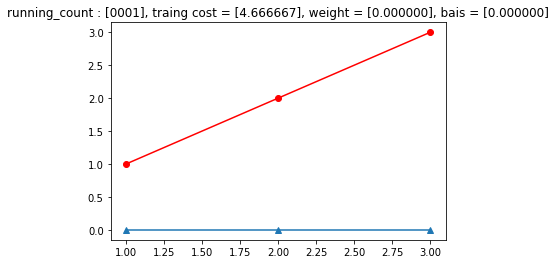

....
Running count : 0002 Training cost = 3.6927407 W = [0.09333334] b = [0.04]


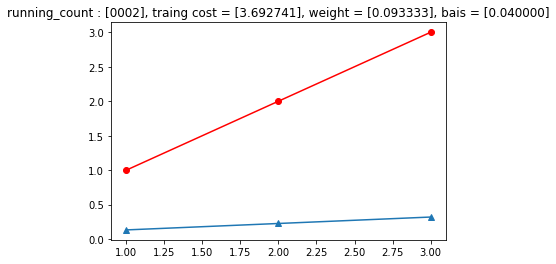

....
Running count : 0003 Training cost = 2.9228852 W = [0.17635557] b = [0.07546666]


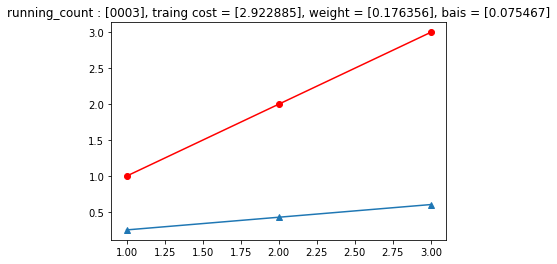

....
Running count : 0004 Training cost = 2.314336 W = [0.2502104] b = [0.10690311]


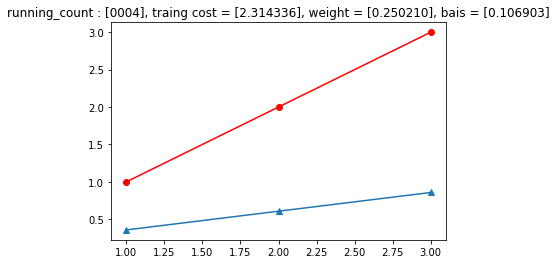

....
Running count : 0005 Training cost = 1.8332924 W = [0.31591463] b = [0.13475662]


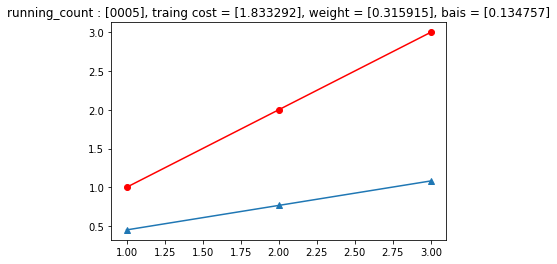

....
Running count : 0006 Training cost = 1.4530338 W = [0.37437233] b = [0.1594249]


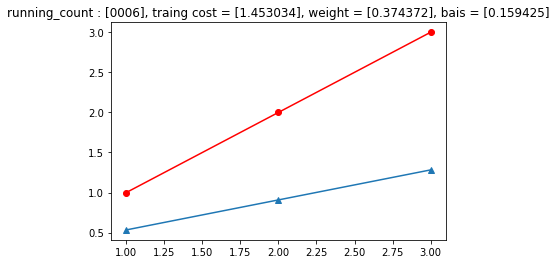

....
Running count : 0007 Training cost = 1.1524409 W = [0.42638725] b = [0.18126151]


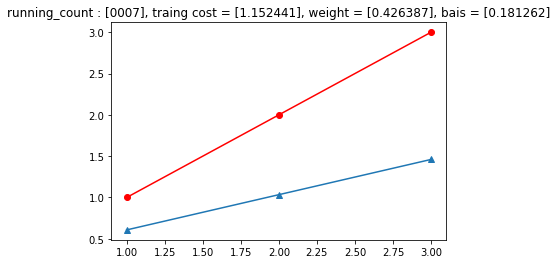

....
Running count : 0008 Training cost = 0.9148195 W = [0.47267398] b = [0.20058079]


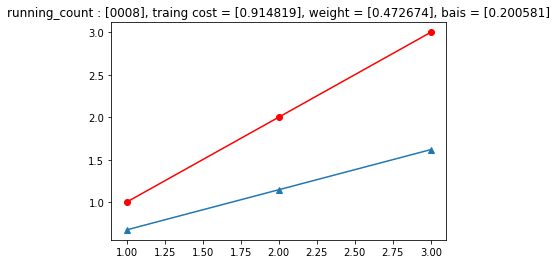

....
Running count : 0009 Training cost = 0.72697395 W = [0.51386786] b = [0.21766222]


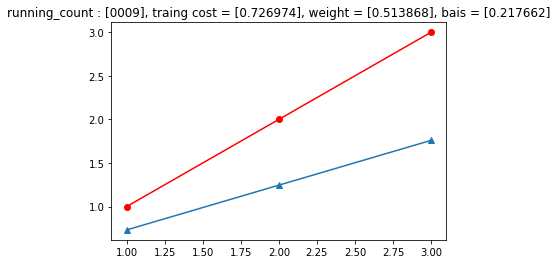

....
Running count : 0010 Training cost = 0.5784736 W = [0.5505337] b = [0.23275426]


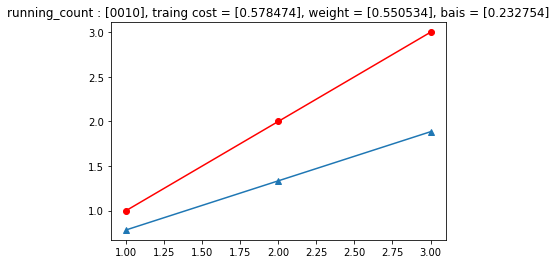

....
Optimization Finished!
Running count : 0010 Training cost = 0.5784736 W = [0.58317375] b = [0.24607782]


In [ ]:
def pagenation (stmt) :
    
 print(stmt,end='')
 input('')


learning_rate = 0.01
training_cnt = 10
display_step = 1

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W = tf.Variable([.0], tf.float32, name = "weight")
b = tf.Variable([.0], tf.float32, name = "bias")


for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.add(tf.multiply(X, W), b)
      cost = tf.reduce_mean(tf.square(pred - Y))
      if (epoch+1) % display_step == 0: 
        print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())

        plt.plot(X, W * X + b, marker = '^')
        plt.plot(X, Y, label='y_data',marker="o",color='r',linewidth=1.5)
        plt.title('running_count : [%04d], traing cost = [%.6f], weight = [%.6f], bais = [%.6f]' % (epoch+1,cost.numpy(),W.numpy(),b.numpy()))
        plt.pause(0.1)
        plt.show()
    
        pagenation('....')
    
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())   

### 100번 학습

Running count : 0010 Training cost = 0.5784736 W = [0.5505337] b = [0.23275426]


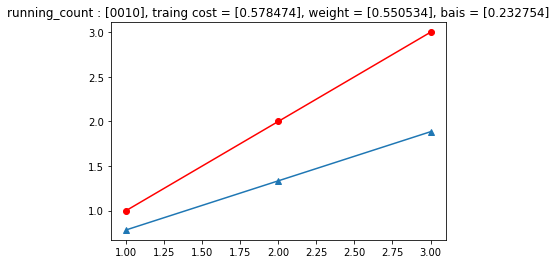

....
Running count : 0020 Training cost = 0.07108992 W = [0.75537497] b = [0.3126272]


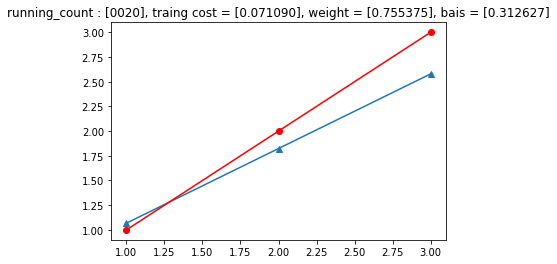

....
Running count : 0030 Training cost = 0.02202488 W = [0.8211032] b = [0.33154753]


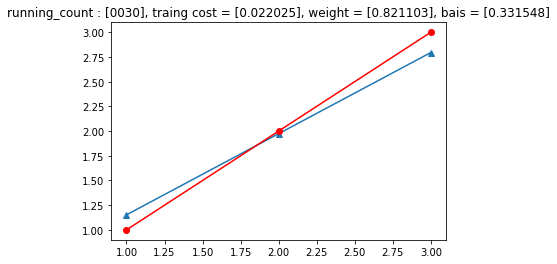

....
Running count : 0040 Training cost = 0.016636007 W = [0.8438446] b = [0.3317955]


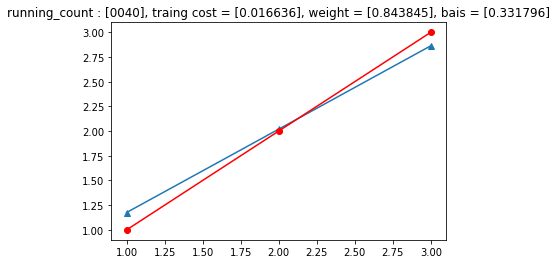

....
Running count : 0050 Training cost = 0.015439604 W = [0.85326284] b = [0.3264146]


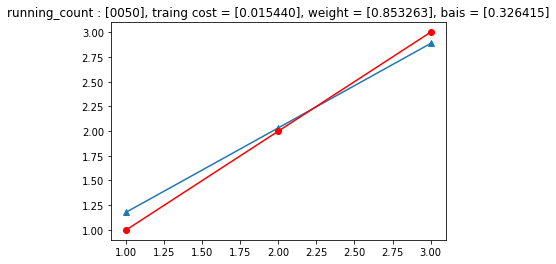

....
Running count : 0060 Training cost = 0.014674502 W = [0.8585127] b = [0.3194265]


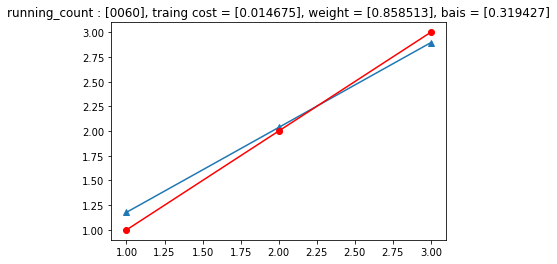

....
Running count : 0070 Training cost = 0.013981109 W = [0.8624206] b = [0.3120692]


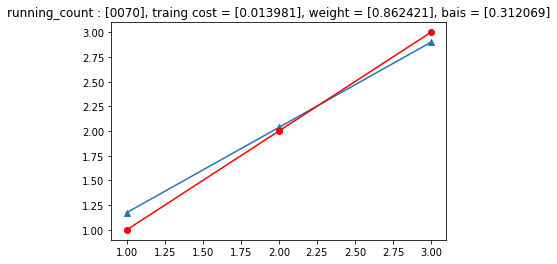

....
Running count : 0080 Training cost = 0.013323699 W = [0.8658599] b = [0.30472165]


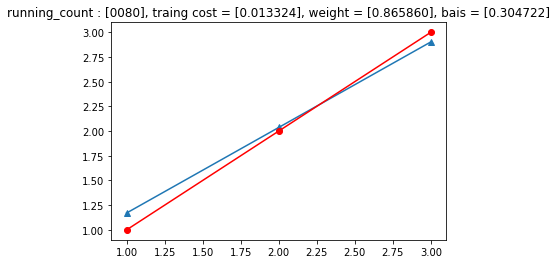

....
Running count : 0090 Training cost = 0.012697489 W = [0.8691016] b = [0.29749787]


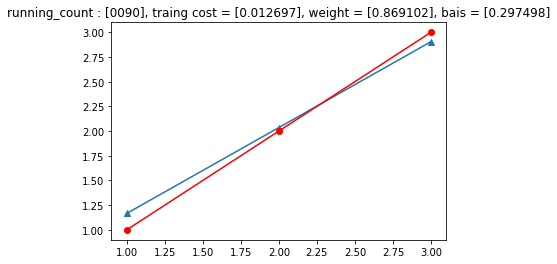

....
Running count : 0100 Training cost = 0.012100749 W = [0.8722305] b = [0.29043013]


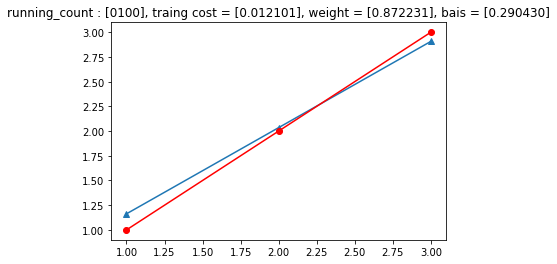

....
Optimization Finished!
Running count : 0100 Training cost = 0.012100749 W = [0.8725385] b = [0.2897323]


In [ ]:
def pagenation (stmt) :
    
 print(stmt,end='')
 input('')


learning_rate = 0.01
training_cnt = 100
display_step = 10

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

W = tf.Variable([.0], tf.float32, name = "weight")
b = tf.Variable([.0], tf.float32, name = "bias")


for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.add(tf.multiply(X, W), b)
      cost = tf.reduce_mean(tf.square(pred - Y))
      if (epoch+1) % display_step == 0: 
        print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())

        plt.plot(X, W * X + b, marker = '^')
        plt.plot(X, Y, label='y_data',marker="o",color='r',linewidth=1.5)
        plt.title('running_count : [%04d], traing cost = [%.6f], weight = [%.6f], bais = [%.6f]' % (epoch+1,cost.numpy(),W.numpy(),b.numpy()))
        plt.pause(0.1)
        plt.show()
    
        pagenation('....')
    
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Running count : " '%04d' % (epoch+1), "Training cost =", cost.numpy(), "W =", W.numpy(), "b =", b.numpy())   